In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
dataset=pd.read_csv('mcdonalds.csv');

In [3]:
dataset.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
dataset.shape

(1453, 15)

In [5]:
dataset.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [6]:
MD=dataset.iloc[ :,0:11]

In [7]:
MD = MD.replace({'Yes': 1, 'No': 0})

In [8]:
mean=round(MD.mean(),2)

In [9]:
MD.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [10]:
mean

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


In [11]:
from sklearn.decomposition import PCA
pca=PCA()
MD_pca=pca.fit(MD)

In [12]:
explained_variance = pca.explained_variance_ratio_
cumulative_proportion = np.cumsum(explained_variance)

In [13]:
print("Importance of components:\n")
for i, (std_dev, prop_var, cum_var) in enumerate(zip(np.sqrt(pca.explained_variance_), explained_variance, cumulative_proportion), 1):
    print(f"PC{i}")
    print(f"Standard deviation: {std_dev:.4f}")
    print(f"Proportion of Variance: {prop_var:.4f}")
    print(f"Cumulative Proportion: {cum_var:.4f}")
    print()

Importance of components:

PC1
Standard deviation: 0.7570
Proportion of Variance: 0.2994
Cumulative Proportion: 0.2994

PC2
Standard deviation: 0.6075
Proportion of Variance: 0.1928
Cumulative Proportion: 0.4922

PC3
Standard deviation: 0.5046
Proportion of Variance: 0.1330
Cumulative Proportion: 0.6253

PC4
Standard deviation: 0.3988
Proportion of Variance: 0.0831
Cumulative Proportion: 0.7084

PC5
Standard deviation: 0.3374
Proportion of Variance: 0.0595
Cumulative Proportion: 0.7679

PC6
Standard deviation: 0.3103
Proportion of Variance: 0.0503
Cumulative Proportion: 0.8182

PC7
Standard deviation: 0.2897
Proportion of Variance: 0.0438
Cumulative Proportion: 0.8620

PC8
Standard deviation: 0.2751
Proportion of Variance: 0.0395
Cumulative Proportion: 0.9016

PC9
Standard deviation: 0.2653
Proportion of Variance: 0.0368
Cumulative Proportion: 0.9383

PC10
Standard deviation: 0.2488
Proportion of Variance: 0.0324
Cumulative Proportion: 0.9707

PC11
Standard deviation: 0.2369
Proportion

In [14]:
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (1, .., p={}):".format(len(std_devs)))
print(np.round(std_devs, 1))



Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [15]:
rotation_matrix = pca.components_.T
features = MD.columns

print("\nRotation (n x k) = ({} x {}):".format(rotation_matrix.shape[0], rotation_matrix.shape[1]))
rotation_df = pd.DataFrame(np.round(rotation_matrix, 2), index=features, columns=["PC{}".format(i+1) for i in range(rotation_matrix.shape[1])])
print(rotation_df)


Rotation (n x k) = (11 x 11):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04


In [16]:
rotation_df=round(-rotation_df,3)
rotation_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.48,-0.36,0.30,-0.06,0.31,-0.17,0.28,-0.01,-0.57,0.11,-0.05
convenient,0.16,-0.02,0.06,0.14,-0.28,0.35,0.06,0.11,0.02,0.67,0.54
spicy,0.01,-0.02,0.04,-0.20,-0.07,0.36,-0.71,-0.38,-0.40,0.08,-0.14
fattening,-0.12,0.03,0.32,0.35,0.07,0.41,0.39,-0.59,0.16,0.01,-0.25
greasy,-0.30,0.06,0.80,-0.25,-0.36,-0.21,-0.04,0.14,0.00,-0.01,-0.00
fast,0.11,0.09,0.06,0.10,-0.11,0.59,0.09,0.63,-0.17,-0.24,-0.34
cheap,0.34,0.61,0.15,-0.12,0.13,0.10,0.04,-0.14,-0.08,-0.43,0.49
tasty,0.47,-0.31,0.29,0.00,0.21,0.08,-0.36,0.07,0.64,-0.08,-0.02
expensive,-0.33,-0.60,-0.02,-0.07,0.00,0.26,0.07,-0.03,-0.07,-0.45,0.49
healthy,0.21,-0.08,-0.19,-0.76,-0.29,0.18,0.35,-0.18,0.19,0.04,-0.16


In [17]:
!pip install bioinfokit
from bioinfokit.visuz import cluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59220 sha256=65fb0ec76cfeba1e1e855fad21ce0938f5ac6ef2894627b56d1f6e2b5bc62679
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


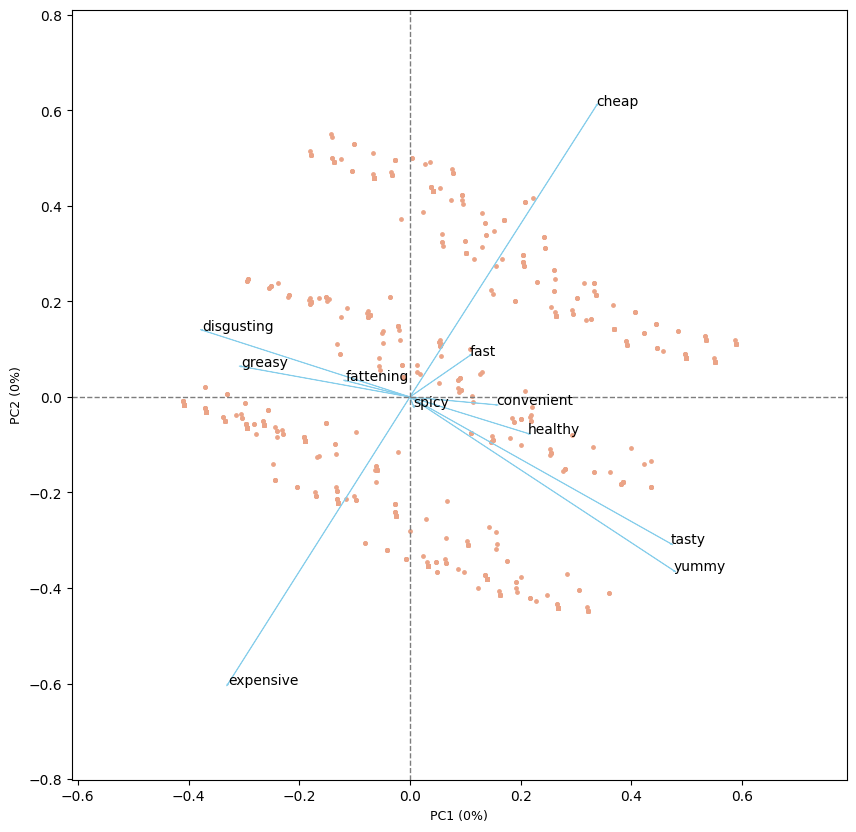

In [18]:
# Calculate the principal components and store the transformed data in MD_pca
MD_pca = pca.fit_transform(MD)

# The rest of the code remains the same
load=(pca.components_)
cluster.biplot(cscore=MD_pca, loadings=-load, labels=dataset.columns.values,var1=0,var2=0, show=True, dim=(10, 10))

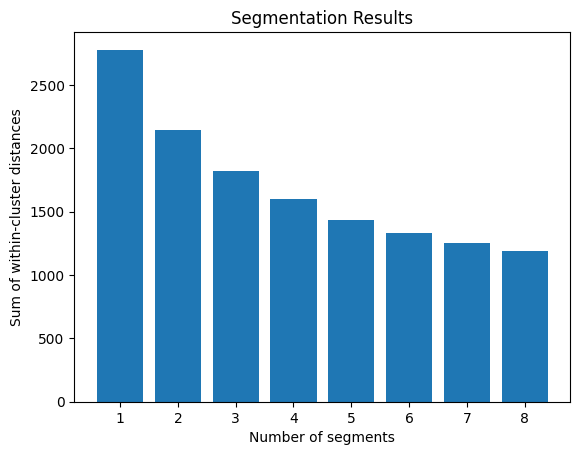

In [19]:
from sklearn.cluster import KMeans
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

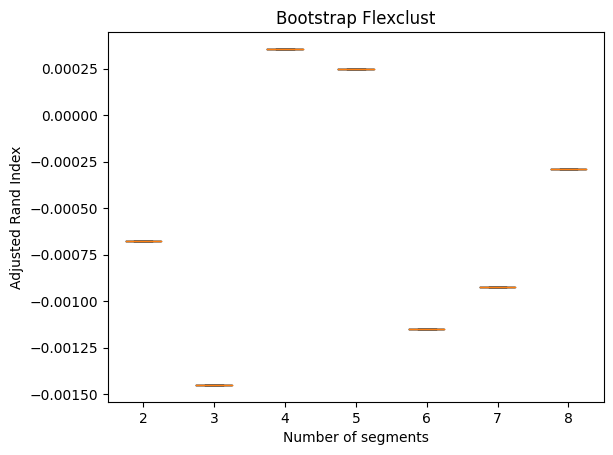

In [21]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    #MD is already a numpy array. Remove .values
    bootstrap_sample = resample(MD, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)

        #MD is already a numpy array. Remove .values
        true_labels = kmeans.predict(MD)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# Create boxplot of adjusted Rand index
plt.boxplot(adjusted_rand_index, labels=num_segments, whis=10)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()

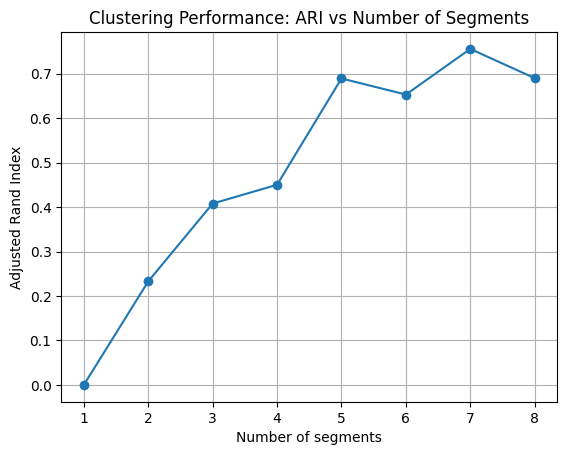

In [22]:
num_segments = range(1, 9)  # The range of k used in clustering
ari_scores = []

# Compute ARI for each k
for k in num_segments:
    model = MD_km28[str(k)]
    labels = model.labels_
    ari = adjusted_rand_score(true_labels, labels)
    ari_scores.append(ari)

# Plotting ARI vs Number of Segments
plt.plot(num_segments, ari_scores, marker='o')
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Performance: ARI vs Number of Segments")
plt.grid(True)
plt.show()

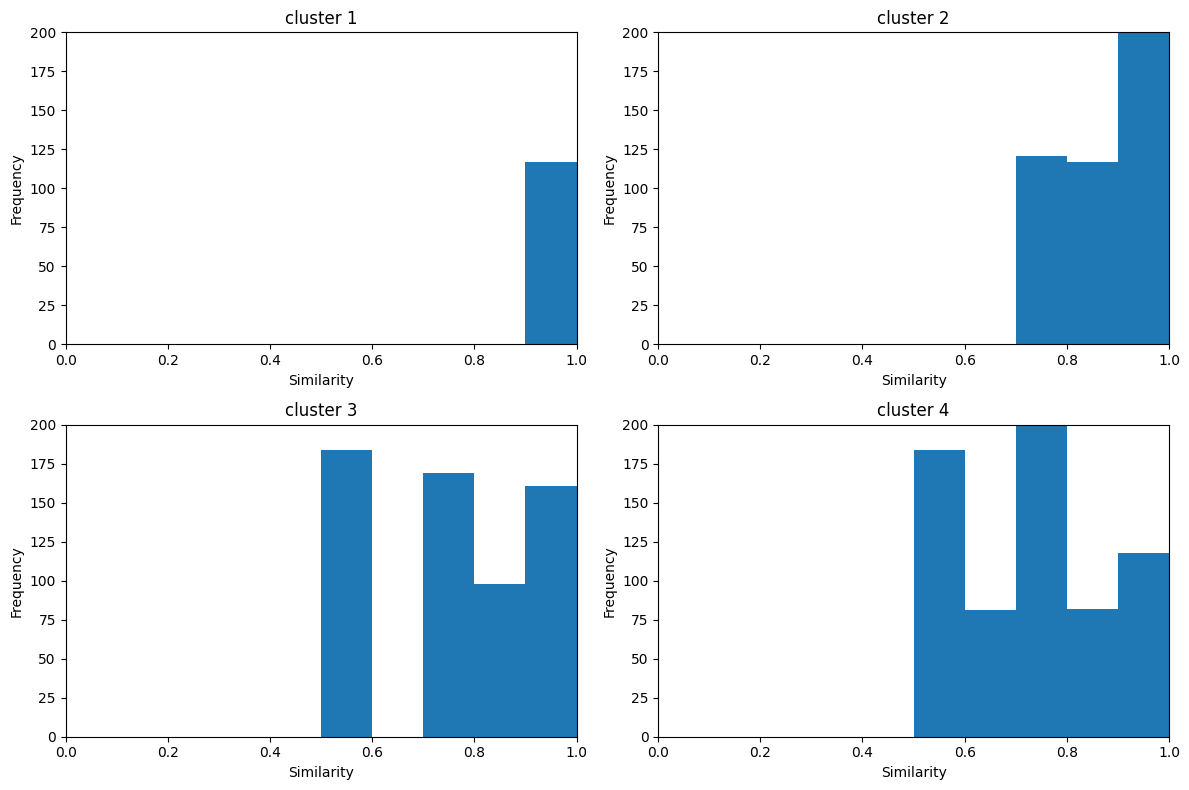

In [23]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD)
    similarities = MD_km28[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

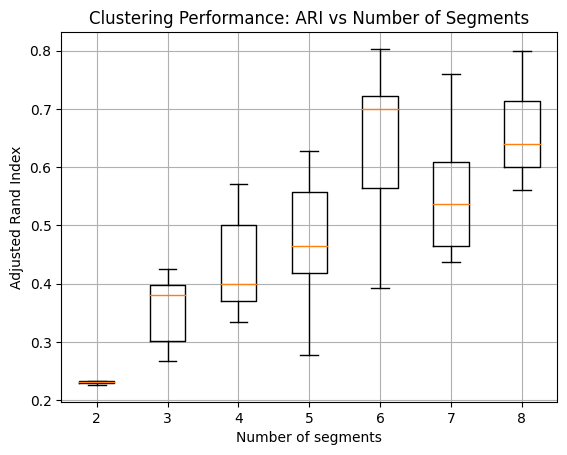

In [24]:
num_segments = range(2, 9)
nrep = 10  # Number of repetitions for each k

# Dictionary to store ARI scores for each k
ari_scores_dict = {k: [] for k in num_segments}

# Compute ARI for each k over multiple runs
for k in num_segments:
    for _ in range(nrep):
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
        kmeans.fit(MD)
        labels = kmeans.labels_
        ari = adjusted_rand_score(true_labels, labels)
        ari_scores_dict[k].append(ari)

# Plotting the box plot for ARI scores
plt.boxplot([ari_scores_dict[k] for k in num_segments], labels=num_segments)
plt.xlabel("Number of segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Clustering Performance: ARI vs Number of Segments")
plt.grid(True)
plt.show()

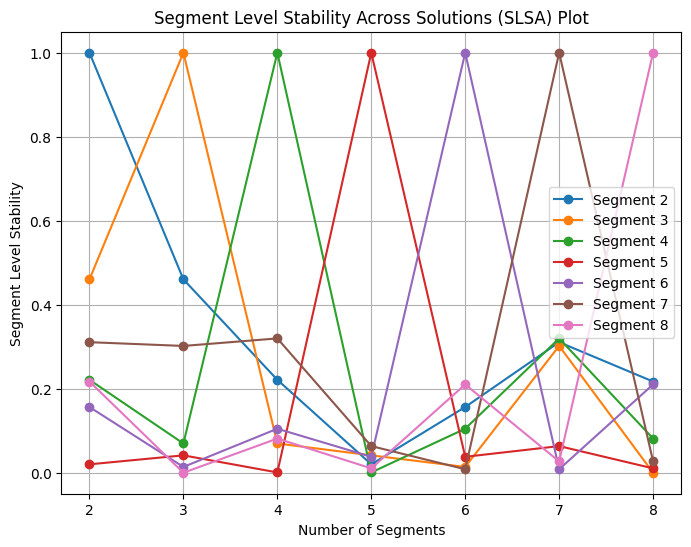

In [25]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

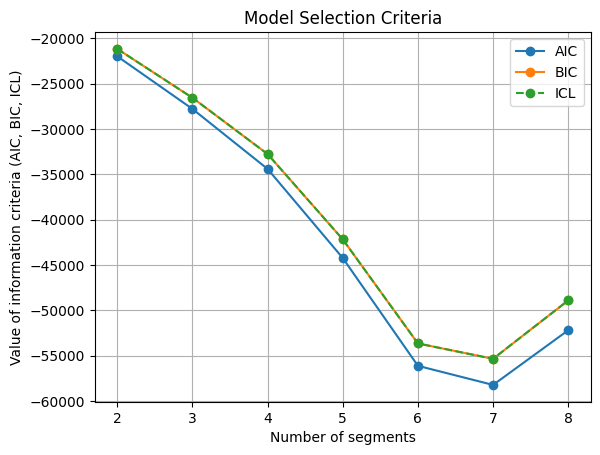

col_0    0    1    2    3
row_0                    
0       31   51  268   14
1        4  214    0   22
2      143    0  362   28
3        0    3    0  313


In [27]:
from sklearn.mixture import GaussianMixture

np.random.seed(1234)

# Step 1: Fit models with different numbers of components
k_range = range(2, 9)
aic_values = []
bic_values = []
icl_values = []
models = {}

for k in k_range:
    gm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gm.fit(MD)

    aic = gm.aic(MD)
    bic = gm.bic(MD)

    # Compute entropy for ICL
    responsibilities = gm.predict_proba(MD)
    log_resp = np.log(responsibilities + 1e-10)  # add small value to avoid log(0)
    entropy = -np.sum(responsibilities * log_resp)

    icl = bic - 2 * entropy

    aic_values.append(aic)
    bic_values.append(bic)
    icl_values.append(icl)

    models[str(k)] = gm

# Step 2: Plot AIC, BIC, and ICL
plt.plot(k_range, aic_values, marker='o', label='AIC')
plt.plot(k_range, bic_values, marker='o', label='BIC')
plt.plot(k_range, icl_values, marker='o', label='ICL', linestyle='--')
plt.xlabel('Number of segments')
plt.ylabel('Value of information criteria (AIC, BIC, ICL)')
plt.title('Model Selection Criteria')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Retrieve the 4-cluster models
MD_m4 = models["4"]
MD_k4 = MD_km28["4"]

# Step 4: Create a contingency table
kmeans_labels = MD_k4.labels_
mixture_labels = MD_m4.predict(MD)

contingency_table = pd.crosstab(kmeans_labels, mixture_labels)
print(contingency_table)

In [ ]:

kmeans_model = MD_km28["4"]
kmeans_labels = kmeans_model.labels_
gm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gm.fit(MD)
mixture_labels = gm.predict(MD)


contingency_table = pd.crosstab(kmeans_labels, mixture_labels)

print("Contingency Table:")
print(contingency_table)


In [28]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD)
kmeans_clusters = kmeans.predict(MD)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0         99    5  253    7
1          0  211   24    5
2        500    0    0   33
3         22   38    0  256
kmeans   0   1   2   3
kmeans                
0       29  10  17  23
1       18   8  12  11
2       45  14  31  19
3       29   5  15  15


In [32]:
gm_m4a = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gm_m4a.fit(MD)
log_likelihood_m4a = gm_m4a.score(MD) * MD.shape[0]  # total log-likelihood
print(f"log Lik. (MD.m4a): {log_likelihood_m4a:.3f} (df={gm_m4a._n_parameters()})")

# For the second model (MD.m4 equivalent in Python)
gm_m4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gm_m4.fit(MD)
log_likelihood_m4 = gm_m4.score(MD) * MD.shape[0]  # total log-likelihood
print(f"log Lik. (MD.m4): {log_likelihood_m4:.3f} (df={gm_m4._n_parameters()})")

log Lik. (MD.m4a): 17513.542 (df=311)
log Lik. (MD.m4): 17513.542 (df=311)


In [34]:
like_counts = pd.value_counts(dataset['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)


Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [37]:
like_mapping = {
    'I HATE IT!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'I LOVE IT!+5': 5
}
dataset['Like.n'] = dataset['Like'].map(like_mapping)
like_n_counts = dataset['Like.n'].value_counts()
print(like_n_counts)

Like.n
 0.0    169
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: count, dtype: int64


In [40]:
from patsy import dmatrices

independent_vars = dataset.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=dataset)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [42]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=dataset)
y = dmatrix('Like', data=dataset)

n_components = 2
n_init = 10
verbose = False
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


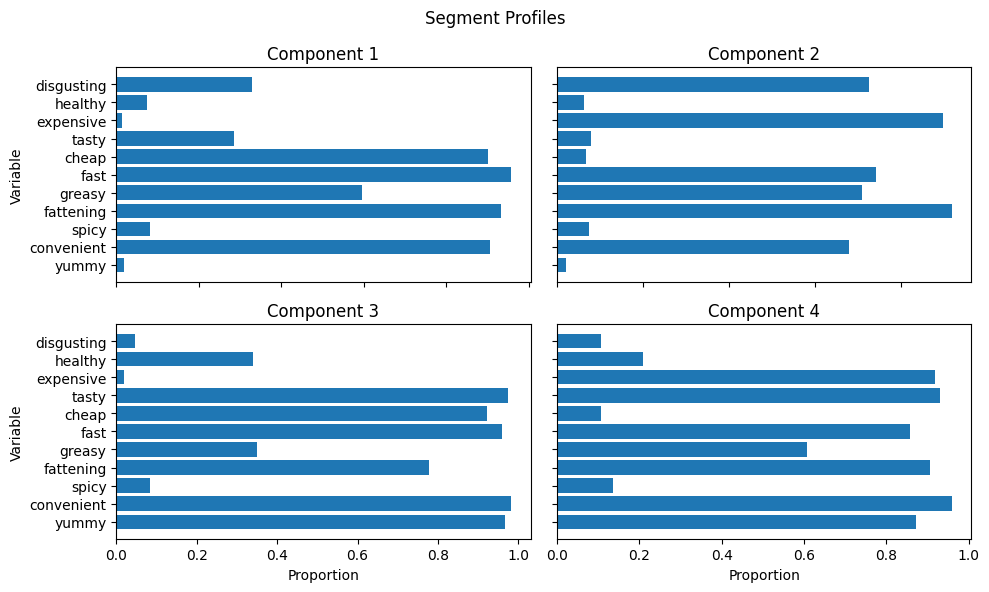

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

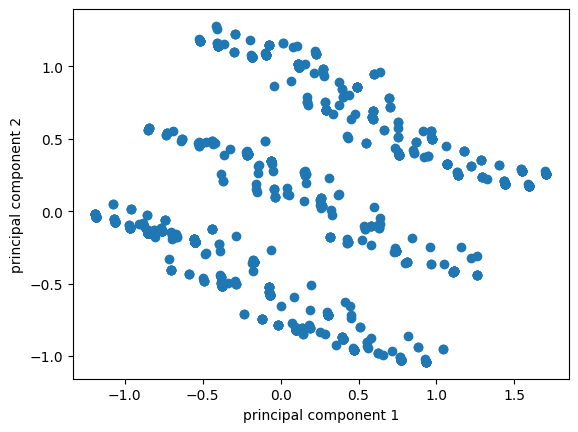

In [44]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
kmeans.fit(MD)

pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD)

fig, ax = plt.subplots()

ax.scatter(MD_pca[:, 0], MD_pca[:, 1])
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

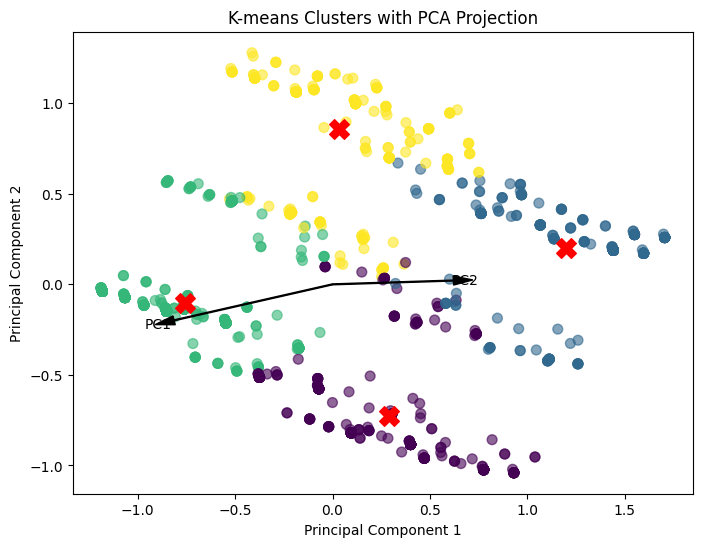

In [46]:
MD_k4 = KMeans(n_clusters=4, random_state=1234)
MD_k4.fit(MD)
centers_pca = pca.transform(MD_k4.cluster_centers_)

# Step 3: Plot the data points colored by cluster and the cluster centers
plt.figure(figsize=(8, 6))

# Plot the PCA-transformed data points, colored by k-means cluster
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4.labels_, cmap='viridis', alpha=0.6, s=50)

# Plot the k-means cluster centers
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X')

# Labeling the axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Step 4: Plot the PCA axes (projAxes equivalent)
# You can visualize the PCA axes by plotting arrows from the origin
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, comp[0] * max(MD_pca[:, 0]), comp[1] * max(MD_pca[:, 1]),
              color='black', width=0.005, head_width=0.05, head_length=0.1)
    plt.text(comp[0] * max(MD_pca[:, 0]) * 1.1, comp[1] * max(MD_pca[:, 1]) * 1.1,
             f'PC{i+1}', color='black', ha='center', va='center')

plt.title("K-means Clusters with PCA Projection")
plt.grid(False)
plt.show()

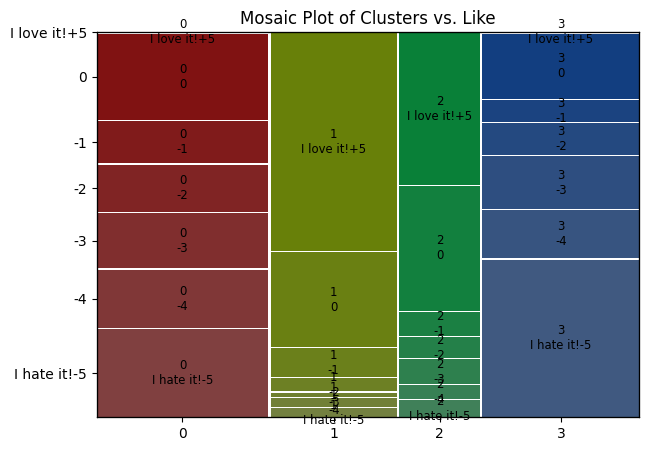

In [51]:
def labelling(x):
    dataset[x] = LabelEncoder().fit_transform(dataset[x])
    return dataset

# List of categorical columns to encode
cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Apply label encoding to each column in the list
for i in cat:
    labelling(i)

# Select the relevant columns for clustering
df_eleven = dataset.loc[:, cat]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)

# Add the cluster labels to the dataset
dataset['cluster_num'] = kmeans.labels_

# Create a crosstab to compare clusters with the 'Like' column
crosstab = pd.crosstab(dataset['cluster_num'], dataset['Like'])

# If the 'Like' column has specific labels, ensure they exist in the crosstab
# Reordering the columns if they exist in the crosstab
like_order = ['I hate it!-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', 'I love it!+5']
crosstab = crosstab.reindex(columns=[col for col in like_order if col in crosstab.columns])

# Plotting the mosaic plot
plt.rcParams['figure.figsize'] = (7, 5)
mosaic(crosstab.stack(), title="Mosaic Plot of Clusters vs. Like")
plt.show()

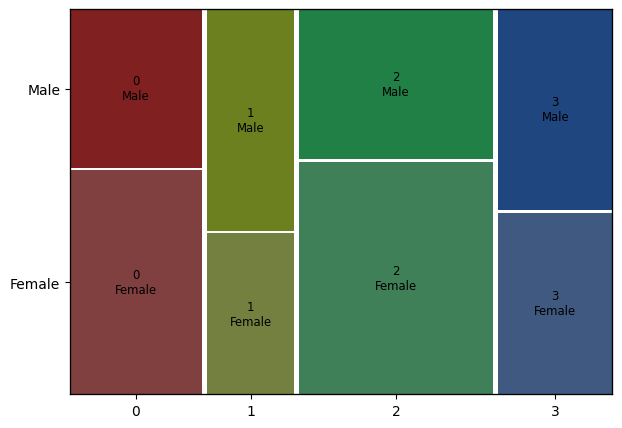

In [53]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, dataset['Gender'])
ct
mosaic(ct.stack(),gap=0.01)

plt.show()

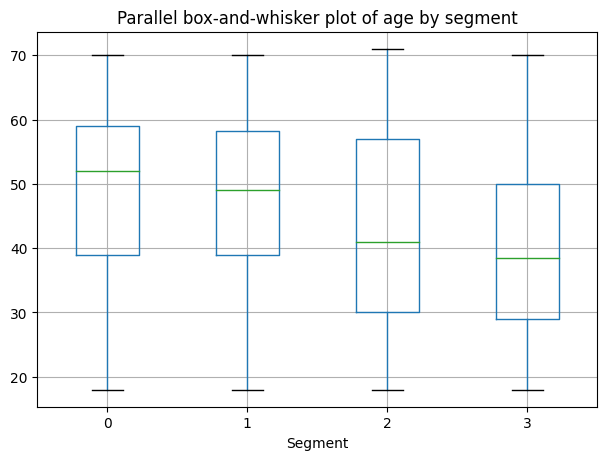

In [55]:
df = pd.DataFrame({'Segment': k4, 'Age': dataset['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [56]:
dataset['VisitFrequency'] = LabelEncoder().fit_transform(dataset['VisitFrequency'])
visit = dataset.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.809061
1,1,2.584483
2,2,2.540123
3,3,2.679167


In [57]:
dataset['Like'] = LabelEncoder().fit_transform(dataset['Like'])
Like = dataset.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.423948
1,1,3.794828
2,2,3.808642
3,3,6.775000


In [58]:
dataset['Gender'] = LabelEncoder().fit_transform(dataset['Gender'])
Gender = dataset.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.407767
1,1,0.398276
2,2,0.521605
3,3,0.579167


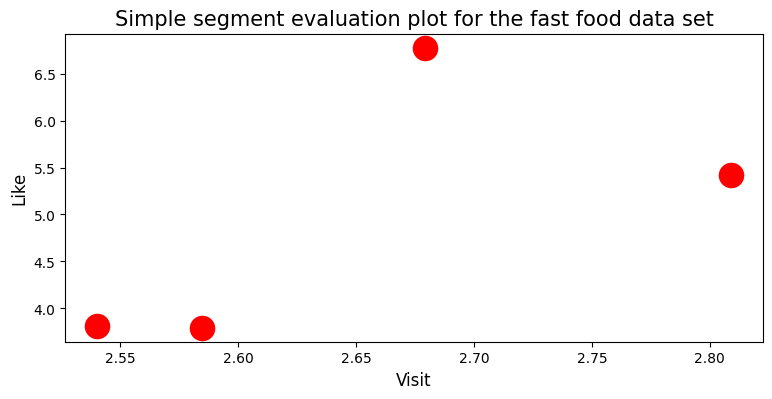

In [59]:
import seaborn as sns
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",fontsize = 15)
plt.xlabel("Visit", fontsize = 12)
plt.ylabel("Like", fontsize = 12)
plt.show()